In [45]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


Getting the MNIST datasets

In [46]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

Visualizing the data

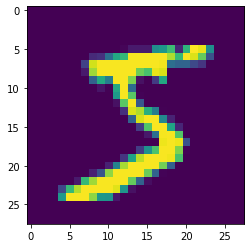

In [47]:
plt.imshow(x_train[0])
plt.show()

Normalizing the trainig data

In [48]:
x_train = x_train / 255.0
x_test =  x_test / 255.0

In [49]:
x_train_flattened = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test_flattened = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [50]:
x_train_flattened.shape

(60000, 28, 28, 1)

Building a convolutional neural network to train the images

In [51]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [52]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [59]:
cnn.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0114 - accuracy: 0.9962
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0087 - accuracy: 0.9973
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0088 - accuracy: 0.9971
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0065 - accuracy: 0.9977


In [60]:
cnn.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0473 - accuracy: 0.9911


[0.04734546318650246, 0.991100013256073]

In [62]:
y_pred = cnn.predict(x_test_flattened)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[3.9601124e-11, 1.6710755e-12, 1.6795119e-11, ..., 1.0000000e+00,
        3.9209070e-12, 4.5927087e-10],
       [3.4111562e-14, 3.5846109e-14, 1.0000000e+00, ..., 5.5103289e-20,
        8.1798777e-22, 4.2449556e-24],
       [2.7553298e-12, 9.9999917e-01, 7.4301665e-10, ..., 7.1736331e-08,
        1.9630782e-08, 2.9665517e-10],
       ...,
       [1.2815631e-24, 1.2729982e-15, 9.4884305e-21, ..., 2.2637435e-16,
        8.4427116e-17, 4.5607523e-13],
       [3.7673256e-17, 3.6679848e-19, 2.2802744e-21, ..., 2.1933597e-23,
        1.8676460e-09, 1.2326784e-17],
       [9.5573870e-12, 3.4985177e-13, 3.9782866e-16, ..., 3.6558471e-26,
        9.2551275e-15, 2.8209939e-17]], dtype=float32)

In [75]:
print(np.argmax(y_pred[11]))

6


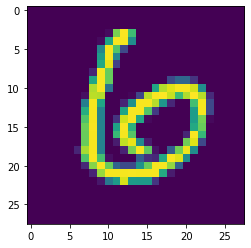

In [76]:
plt.imshow(x_test_flattened[11])